# Notebook for Importance analysis and dimensionality reduction  
The importances will be analyzed for both fluxes seperate and then combined using DecisionTreeRegressor and MultiOutputRegressor from sklearn

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor

In [24]:
data = pd.read_csv('data/data_merged_with_nans.csv')
data = data.dropna() # Drop all nans for this analyis
data.head()

,year,month,day,30min,location,H_orig,LE_orig,H_f,LE_f,waterPressureDeficit,waterVaporPressure,outgoingShortwaveRadiation,incomingShortwaveRadiation,windSpeed,airPressure,soilHeatflux,relativeHumidity
4462,2023,2,16,23,0,93.76650,112.710,93.76650,112.71100,2.131392,6.857902,87.725333,408.582000,1.988667,996.140667,6.283667,76.289667
4466,2023,2,16,25,0,51.96510,30.423,51.96510,30.42276,2.456927,6.827809,53.086667,256.372000,1.910667,995.548000,11.058000,73.538000
4468,2023,2,16,26,0,69.53238,39.713,69.53238,39.71283,2.997957,7.012585,82.873667,371.893667,1.548333,995.325667,10.838333,70.052000
4470,2023,2,16,27,0,71.31974,39.382,71.31974,39.38237,3.479701,6.975607,78.387333,342.721000,2.116000,994.989667,13.126333,66.718333
4472,2023,2,16,28,0,48.84439,32.021,48.84439,32.02052,3.488345,7.070665,62.984667,279.880333,1.428333,994.960000,14.722000,66.963333


In [25]:
# Do the analysis for H & LE -> Drop from data
y = data[['H_orig', 'LE_orig']]
X = data.drop(columns=['H_orig', 'LE_orig', 'H_f', 'LE_f'])
X.head()

,year,month,day,30min,location,waterPressureDeficit,waterVaporPressure,outgoingShortwaveRadiation,incomingShortwaveRadiation,windSpeed,airPressure,soilHeatflux,relativeHumidity
4462,2023,2,16,23,0,2.131392,6.857902,87.725333,408.582000,1.988667,996.140667,6.283667,76.289667
4466,2023,2,16,25,0,2.456927,6.827809,53.086667,256.372000,1.910667,995.548000,11.058000,73.538000
4468,2023,2,16,26,0,2.997957,7.012585,82.873667,371.893667,1.548333,995.325667,10.838333,70.052000
4470,2023,2,16,27,0,3.479701,6.975607,78.387333,342.721000,2.116000,994.989667,13.126333,66.718333
4472,2023,2,16,28,0,3.488345,7.070665,62.984667,279.880333,1.428333,994.960000,14.722000,66.963333


In [26]:
# Train-test-split and fitting the Decision trees
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Per flux
DtreeH = DecisionTreeRegressor(random_state=42)
DtreeLE = DecisionTreeRegressor(random_state=42)
DtreeH.fit(X_train, y_train['H_orig'])
DtreeLE.fit(X_train, y_train['LE_orig'])
# Fluxes combined
baseDtree = DecisionTreeRegressor(random_state=42)
Mout = MultiOutputRegressor(baseDtree)
Mout.fit(X_train, y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor(random_state=42))

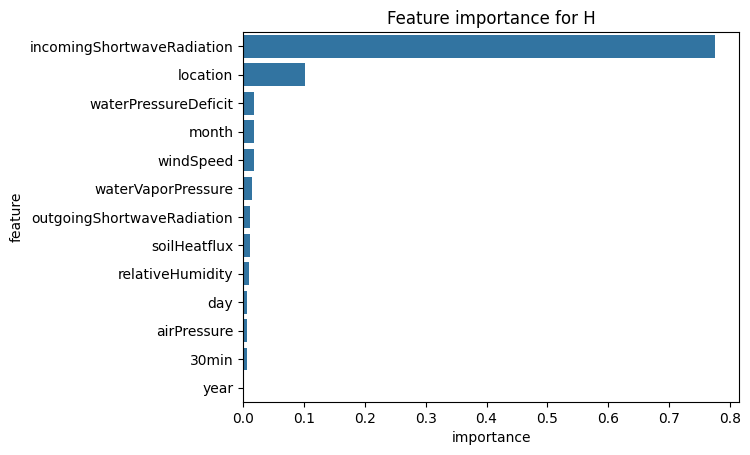

In [32]:
# Visualization of immportances for H
H_importance = DtreeH.feature_importances_
feature_names = X.columns

# Save importances in dataframe for sorted visualization
H_importance_df = pd.DataFrame({'feature': feature_names, 'importance': H_importance})
H_importance_df = H_importance_df.sort_values(by='importance', ascending=False)

plt.figure()
sns.barplot(x='importance', y='feature', data=H_importance_df)
plt.title('Feature importance for H')
plt.show()

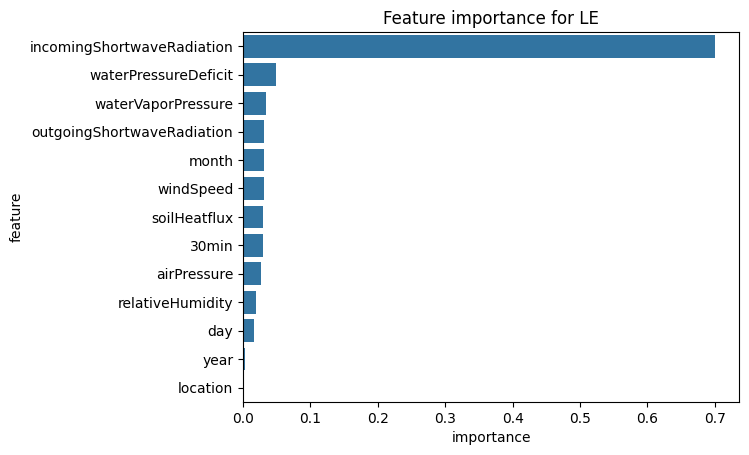

In [33]:
# Visualization of immportances for H
LE_importance = DtreeLE.feature_importances_

# Save importances in dataframe for sorted visualization
LE_importance_df = pd.DataFrame({'feature': feature_names, 'importance': LE_importance})
LE_importance_df = LE_importance_df.sort_values(by='importance', ascending=False)

plt.figure()
sns.barplot(x='importance', y='feature', data=LE_importance_df)
plt.title('Feature importance for LE')
plt.show()

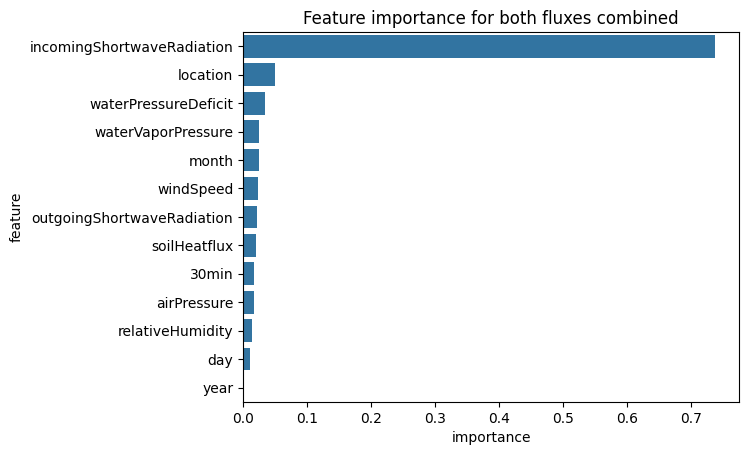

In [35]:
# Visualization of importances for both combined
Comb_importance = np.mean([estimator.feature_importances_ for estimator in Mout.estimators_], axis=0) # Mean of feature importances

Comb_importance_df = pd.DataFrame({'feature': feature_names, 'importance': Comb_importance})
Comb_importance_df = Comb_importance_df.sort_values(by='importance', ascending=False)

plt.figure()
sns.barplot(x='importance', y='feature', data=Comb_importance_df)
plt.title('Feature importance for both fluxes combined')
plt.show()

C:\Users\Robin\AppData\Local\Temp\ipykernel_14760\1468021279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=Comb_importance_df, ax=ax[0], palette=color_mapping)
C:\Users\Robin\AppData\Local\Temp\ipykernel_14760\1468021279.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=H_importance_df, ax=ax[1], palette=color_mapping)
C:\Users\Robin\AppData\Local\Temp\ipykernel_14760\1468021279.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=LE_

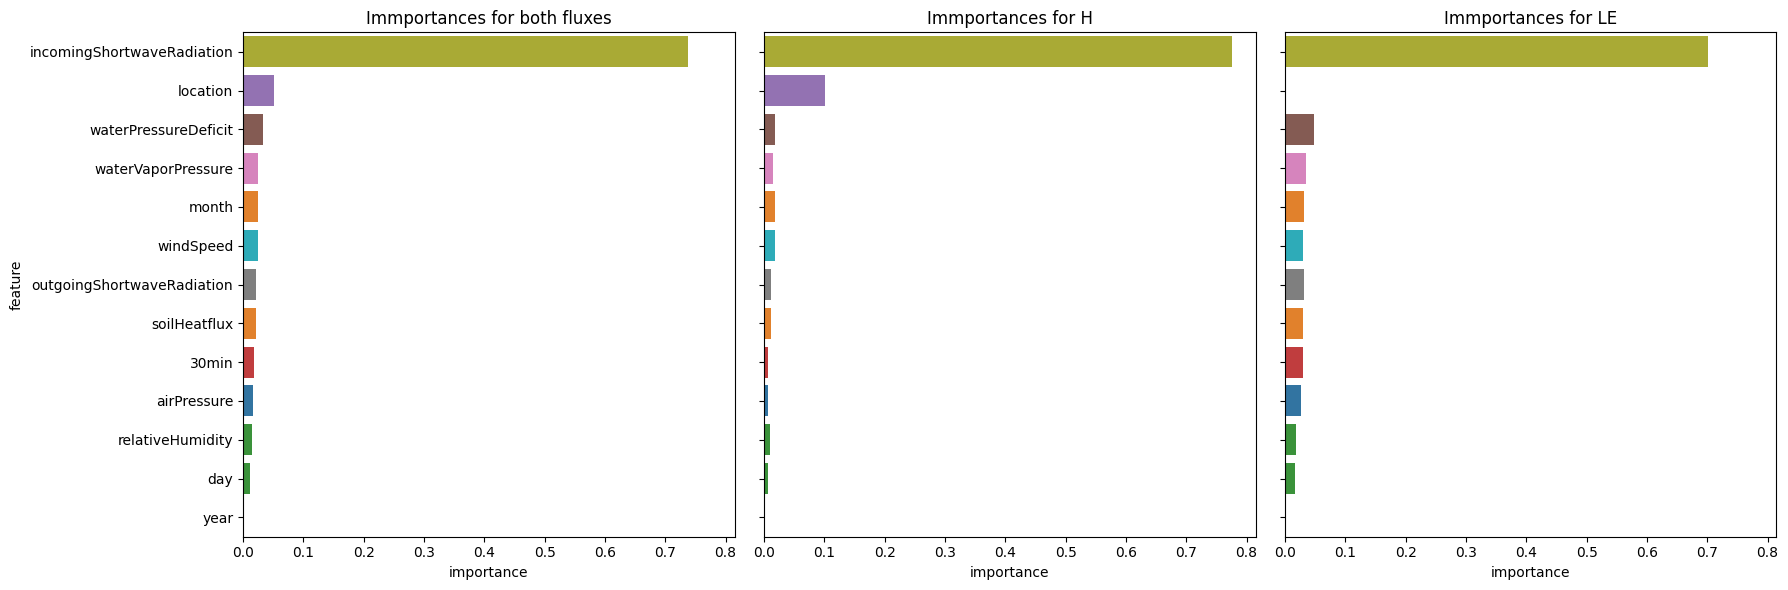

In [49]:
# Subplot containing all

colors = sns.color_palette("tab10", len(feature_names)) # Some colors for better readability
color_mapping = {feature_names[i]: colors[i] for i in range(len(feature_names))}

fig, ax = plt.subplots(1,3, figsize=(18,6), sharex=True, sharey=True)
sns.barplot(x='importance', y='feature', data=Comb_importance_df, ax=ax[0], palette=color_mapping)
sns.barplot(x='importance', y='feature', data=H_importance_df, ax=ax[1], palette=color_mapping)
sns.barplot(x='importance', y='feature', data=LE_importance_df, ax=ax[2], palette=color_mapping)
ax[0].set_title("Immportances for both fluxes")
ax[1].set_title("Immportances for H")
ax[2].set_title("Immportances for LE")
plt.tight_layout()